In [1]:
from mantid.simpleapi import *           # importing Mantid algorithms
import mantid.plots                      # allow plotting for workspaces
import matplotlib.pyplot as plt          # matplotlib plotting
from matplotlib.colors import LogNorm    # logscale for colorbar

/SNS/software/miniconda2/envs/py3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
%matplotlib notebook

## Running a simple script

In [3]:
cd ~/notebooks/IPythonNotebookTutorial-notebooks

/SNS/users/3y9/notebooks/IPythonNotebookTutorial-notebooks


### Load a file, sum all the spectra, and rebin

In [4]:
Load(Filename='Data/Mantid/HYS_104287.nxs.h5',OutputWorkspace='data')
SumSpectra(InputWorkspace='data',OutputWorkspace='summed')
Rebin(InputWorkspace='summed',OutputWorkspace='rebinned', Params='10')

EventWorkspace
Title: MnO,  20 meV, 120hz,  P horiz along Q,  Flip OFF s2-35
Histograms: 1
Bins: 1667
Histogram
X axis: Time-of-flight / microsecond
Y axis: Counts
Distribution: False
Instrument: HYSPEC (2011-Jul-20 to 2100-Jan-31)Instrument from: Data/Mantid/HYS_104287.nxs.h5

Parameters from: /SNS/software/miniconda2/envs/py3/instrument/HYSPEC_Parameters.xml
Run start: 2016-Mar-19 19:13:36
Run end:  2016-Mar-19 21:03:57

Events: 616179

Output is an event workspace, with 1 histogram and 1667 bins. 

## Plotting workspaces

 A tutorial can be found at http://docs.mantidproject.org/nightly/plotting/index.html Here is how to plot it from a script:

<IPython.core.display.Javascript object>


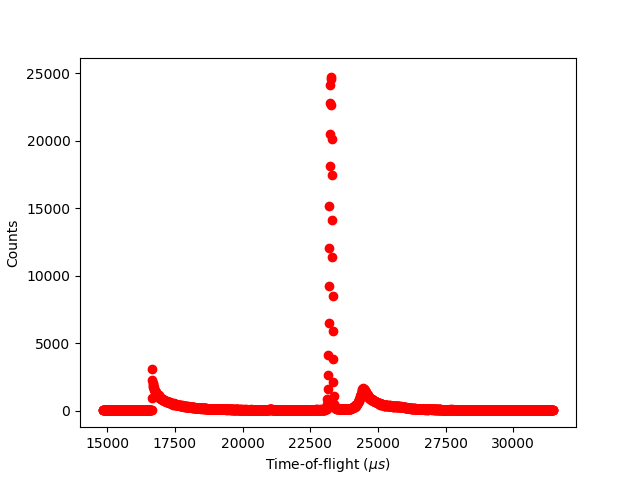

<ErrorbarContainer object of 3 artists>

In [5]:
fig, ax = plt.subplots(subplot_kw={'projection':'mantid'})  # must use the 'mantid' projection
ax.errorbar(mtd['rebinned'],fmt='ro')                       # mtd['name'] is a workspace handle (discussed below)

In [6]:
LoadMD(Filename='Data/Fitting/NaCl.nxs', OutputWorkspace='NaCl')

MDHistoWorkspace
Title: 
Dim 0: (Q_sample_x) -8.01 to 8.01 in 801 bins
Dim 1: (Q_sample_y) -0.5 to 0.5 in 1 bins
Dim 2: (Q_sample_z) -8.01 to 8.01 in 801 bins

Inelastic: ki-kf
Instrument: WAND (2018-Apr-01 to 2100-Jan-31)Instrument from: Data/Fitting/NaCl.nxs

Run start: 2018-May-02 13:34:10
Run end:  not available
Sample: a 5.6, b 5.6, c 5.6; alpha 90, beta 90, gamma 90


<IPython.core.display.Javascript object>


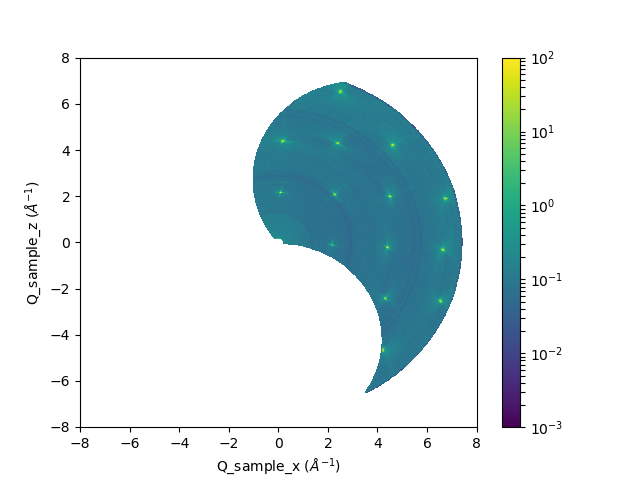

In [7]:
fig, ax = plt.subplots(subplot_kw={'projection':'mantid'}) 
c=ax.pcolormesh(mtd['NaCl'],norm=LogNorm(vmin=1e-3,vmax=100))
cbar=fig.colorbar(c)

## Workspace handles

* Algorithms that take input workspaces can use the workspace name
* If one needs to access the underlying properties of the workspace in python, one needs a workspace hadle
* There are several ways to get hold of a handle:
   * `handle = mtd['wsname']`
   * if there is a workspace called 'wsname', the command `mtd.importAll()` will create a handle called `wsname`
   * as part of the output of an algorithm, such as `ws=Load(filename)`


In [8]:
# this creates a workspace with handle w and name 'w'
w=LoadNXSPE(Filename='Data/Mantid/HYS_104287_4pixel.nxspe')

In [9]:
mde=ConvertToMD(InputWorkspace=w,QDimensions='|Q|',dEAnalysisMode='Direct')

In [10]:
mdh=BinMD(InputWorkspace=mde,AxisAligned=True,AlignedDim0='|Q|,0,4,100',AlignedDim1='DeltaE,-20,17,100')

In [11]:
import numpy as np
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

<IPython.core.display.Javascript object>


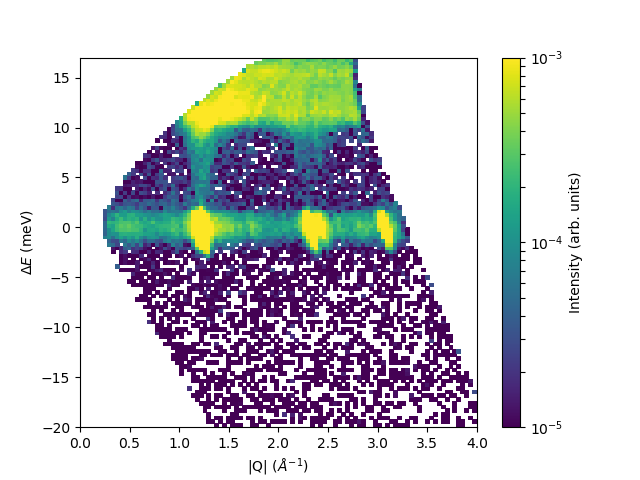

In [12]:
fig, ax = plt.subplots(subplot_kw={'projection':'mantid'})
c = ax.pcolormesh(mdh, norm=LogNorm(vmin=1e-5,vmax=1e-3))
cbar=fig.colorbar(c)
cbar.set_label('Intensity (arb. units)') #add text to colorbar

In [13]:
mtd.getObjectNames() #yields the names (not handles) of all the workspaces

['data',
 'mde',
 'mdh',
 'NaCl',
 'PreprocessedDetectorsWS',
 'rebinned',
 'summed',
 'w']

In [14]:
w.id()

'Workspace2D'

In [15]:
mdh.id()

'MDHistoWorkspace'

In [16]:
data.id()

NameError: name 'data' is not defined

In [17]:
mtd['data'].id()

'EventWorkspace'

In [18]:
ews=mtd['data']
print('Information about the raw data:')
print('Number of events:',ews.getNumberEvents())
print('Number of spectra:',ews.getNumberHistograms())
print('Number of bins:',ews.blocksize())

Information about the raw data:
Number of events: 616179
Number of spectra: 20480
Number of bins: 1


**Note:** If a matrix workspace has more than one spectra, one needs to specify either spectra number or workspace index when plotting

<IPython.core.display.Javascript object>


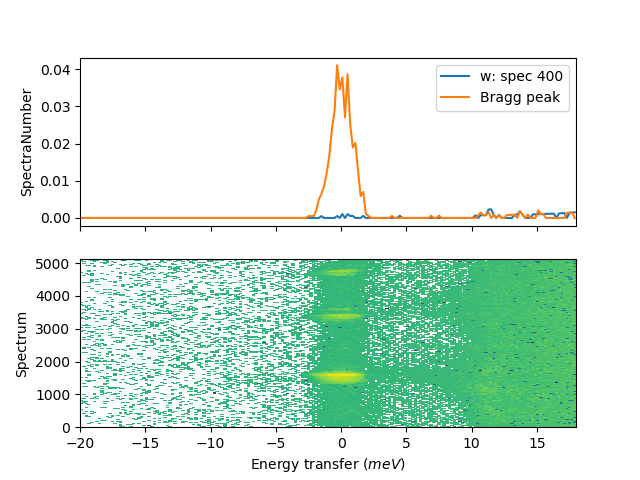

In [19]:
fig, ax = plt.subplots(2,subplot_kw={'projection':'mantid'},sharex=True)
ax[0].plot(w,specNum=400)
ax[0].plot(w,specNum=1500,label='Bragg peak')
ax[1].pcolormesh(w,norm=LogNorm())
ax[0].set_xlabel('')
ax[0].legend()

## Extracting data from a workspace
### Workspace2D

In [20]:
print('X:\n length: {0}\n values: {1}'.format(len(w.readX(1500)),w.readX(1500)))
print('Y:\n length: {0}\n values: {1}'.format(len(w.readY(1500)),w.readY(1500)))
print('E:\n length: {0}\n values: {1}'.format(len(w.readE(1500)),w.readE(1500)))

X:
 length: 191
 values: [-2.00000000e+01 -1.98000000e+01 -1.96000000e+01 -1.94000000e+01
 -1.92000000e+01 -1.90000000e+01 -1.88000000e+01 -1.86000000e+01
 -1.84000000e+01 -1.82000000e+01 -1.80000000e+01 -1.78000000e+01
 -1.76000000e+01 -1.74000000e+01 -1.72000000e+01 -1.70000000e+01
 -1.68000000e+01 -1.66000000e+01 -1.64000000e+01 -1.62000000e+01
 -1.60000000e+01 -1.58000000e+01 -1.56000000e+01 -1.54000000e+01
 -1.52000000e+01 -1.50000000e+01 -1.48000000e+01 -1.46000000e+01
 -1.44000000e+01 -1.42000000e+01 -1.40000000e+01 -1.38000000e+01
 -1.36000000e+01 -1.34000000e+01 -1.32000000e+01 -1.30000000e+01
 -1.28000000e+01 -1.26000000e+01 -1.24000000e+01 -1.22000000e+01
 -1.20000000e+01 -1.18000000e+01 -1.16000000e+01 -1.14000000e+01
 -1.12000000e+01 -1.10000000e+01 -1.08000000e+01 -1.06000000e+01
 -1.04000000e+01 -1.02000000e+01 -1.00000000e+01 -9.80000000e+00
 -9.60000000e+00 -9.40000000e+00 -9.20000000e+00 -9.00000000e+00
 -8.80000000e+00 -8.60000000e+00 -8.40000000e+00 -8.20000000e+00


In [21]:
# One can extract the full arrays
print(w.extractX().shape,w.extractY().shape, w.extractE().shape)

(5120, 191) (5120, 190) (5120, 190)


<IPython.core.display.Javascript object>


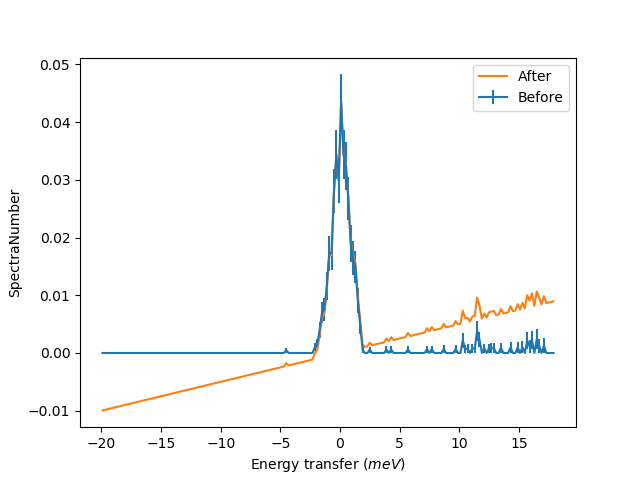

In [22]:
#One can modify the arrays, as long as one keeps the number of elements unchanged
fig,ax=plt.subplots(subplot_kw={'projection':'mantid'})
ax.errorbar(w,wkspIndex=1500,label='Before')
#get bin centers
x=0.5*(w.readX(1500)[0:-1]+w.readX(1500)[1:])
w.setY(1500,w.readY(1500)+0.0005*x)
ax.plot(w,wkspIndex=1500,label='After')
ax.legend()

### Event workspaces

In [23]:
rebinned=mtd['rebinned']
print(rebinned.readX(0),rebinned.readY(0))

[14821.59960938 14831.59960938 14841.59960938 ... 31471.59960938
 31481.59960938 31488.59960938] [27. 39. 42. ... 39. 40. 32.]


In [24]:
#Cannot write
rebinned.setY(0,rebinned.readY(0)*2.)

RuntimeError: EventWorkspace::dataY cannot return a non-const array: you can't modify the histogrammed data in an EventWorkspace!

In [25]:
#can get event list
el=rebinned.getSpectrum(0)
print(el.getTofs())

[14822.59960938 14823.         14823.40039062 ... 31487.5
 31487.5        31487.59960938]


In [26]:
print(el.getWeights())

[1. 1. 1. ... 1. 1. 1.]


### MDHisto workspaces

In [27]:
print('Signal array',mdh.getSignalArray().shape)
print(mdh.getSignalArray())
print('Error squared array',mdh.getErrorSquaredArray().shape)
print('Number of MDEvents array',mdh.getNumEventsArray().shape)

Signal array (100, 100)
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 0.00000000e+00  0.00000000e+00 -3.92959628e-04 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  3.92975926e-04 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  7.81725685e-04 -4.37139533e-07 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
Error squared array (100, 100)
Number of MDEvents array (100, 100)


In [28]:
#get axes
for dim in mdh.getNonIntegratedDimensions():
    print('Dimension:\n name: {0}\n minimum: {1}\n maximum: {2}\n Number of bins: {3}'.format(dim.name,
                                                                                              dim.getMinimum(),
                                                                                              dim.getMaximum(),
                                                                                              dim.getNBins()))

Dimension:
 name: |Q|
 minimum: 0.0
 maximum: 4.0
 Number of bins: 100
Dimension:
 name: DeltaE
 minimum: -20.0
 maximum: 17.0
 Number of bins: 100


## Sample logs

One can plot sample logs using the 'mantid' projection

<IPython.core.display.Javascript object>


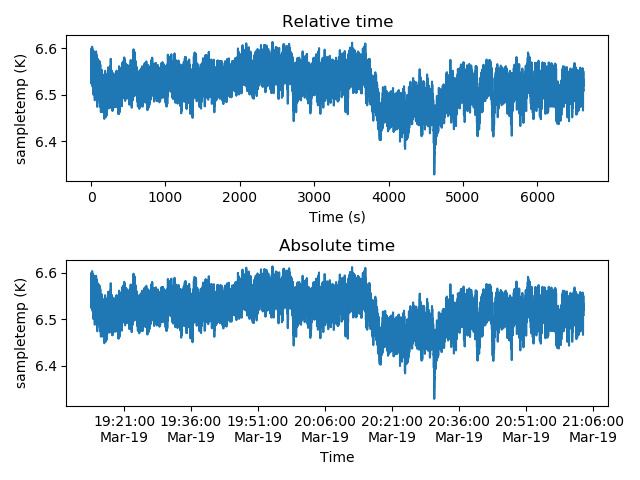

In [29]:
ev_ws=mtd['data']
fig, ax = plt.subplots(2,1,subplot_kw={'projection':'mantid'})
ax[0].plot(ev_ws,LogName='sampletemp')
ax[0].set_title('Relative time')
ax[1].plot(ev_ws,LogName='sampletemp',FullTime=True)
ax[1].set_title('Absolute time')
fig.tight_layout()

### All sample environment logs are attached to the 'run' object

The sample logs can be strings, numbers, or time series

In [30]:
run_obj = ev_ws.getRun()
print(run_obj.keys())

['start_time', 'end_time', 'BL14B:CS:Energy:Ei', 'BL14B:CS:Energy:EiReq', 'BL14B:CS:Scan:Active', 'BL14B:Chop:Skf1:DriveError', 'BL14B:Chop:Skf1:MotorSpeed', 'BL14B:Chop:Skf1:PhaseAccuracy', 'BL14B:Chop:Skf1:PhaseLocked', 'BL14B:Chop:Skf1:SpeedSet', 'BL14B:Chop:Skf1:SpeedUserReq', 'BL14B:Chop:Skf2:DriveError', 'BL14B:Chop:Skf2:MotorSpeed', 'BL14B:Chop:Skf2:PhaseAccuracy', 'BL14B:Chop:Skf2:PhaseLocked', 'BL14B:Chop:Skf2:SpeedSet', 'BL14B:Chop:Skf2:SpeedUserReq', 'BL14B:Chop:Skf3:DriveError', 'BL14B:Chop:Skf3:MotorSpeed', 'BL14B:Chop:Skf3:PhaseAccuracy', 'BL14B:Chop:Skf3:PhaseLocked', 'BL14B:Chop:Skf3:SpeedSet', 'BL14B:Chop:Skf3:SpeedUserReq', 'BL14B:Chop:Skf4:DriveError', 'BL14B:Chop:Skf4:MotorSpeed', 'BL14B:Chop:Skf4:PhaseAccuracy', 'BL14B:Chop:Skf4:PhaseLocked', 'BL14B:Chop:Skf4:SpeedSet', 'BL14B:Chop:Skf4:SpeedUserReq', 'BL14B:Det:N1:Det1:XY:ROI:1:MinX_RBV', 'BL14B:Det:N1:Det1:XY:ROI:1:MinY_RBV', 'BL14B:Det:N1:Det1:XY:ROI:1:SizeX_RBV', 'BL14B:Det:N1:Det1:XY:ROI:1:SizeY_RBV', 'BL14B:D

In [31]:
print('Filename is of type {0}'.format(type(run_obj['Filename'])))
print('duration is of type {0}'.format(type(run_obj['duration'])))
print('sampletemp is of type {0}'.format(type(run_obj['sampletemp'])))

Filename is of type <class 'mantid.kernel._kernel.StringPropertyWithValue'>
duration is of type <class 'mantid.kernel._kernel.FloatPropertyWithValue'>
sampletemp is of type <class 'mantid.kernel._kernel.FloatTimeSeriesProperty'>


To get the value of strings and numbers use the value attribute

In [32]:
print('The length of the run was {0:.2f} seconds'.format(run_obj['duration'].value))

The length of the run was 6621.03 seconds


Time series properties are slightly more complex

In [33]:
temp=run_obj['sampletemp']
print(temp.value)

[6.5406 6.595  6.5993 ... 6.513  6.5087 6.5087]


In [34]:
#One can get all times
print(temp.times)

['2016-03-19T19:13:36.344559666' '2016-03-19T19:13:37.779130166'
 '2016-03-19T19:13:38.359321277' ... '2016-03-19T21:03:55.347554330'
 '2016-03-19T21:03:56.347557234' '2016-03-19T21:03:57.378211666']


In [35]:
#one can get the statistics of the sample log
stats=temp.getStatistics()
print('temperature was {0:.2f} +/- {1:.2f} Kelvin'.format(stats.mean, stats.standard_deviation))

temperature was 6.52 +/- 0.04 Kelvin


## Information about sample and instrument

In [36]:
SetUB(ev_ws,a=4.5,b=4.5,c=6.7,alpha=90,beta=90,gamma=120,u='1,0,0',v='0,1,0')
sample=ev_ws.sample()
print('Sample name: ',sample.getName())
print('a:    ',sample.getOrientedLattice().a())
print('alpha:',sample.getOrientedLattice().gamma())
print('u:    ',sample.getOrientedLattice().getuVector())
print('v:    ',sample.getOrientedLattice().getvVector())

Sample name:  TiZr rod
a:     4.5
alpha: 119.99999999999999
u:     [3.89711,0,0]
v:     [-2.25,4.5,0]


In [37]:
instrument=ev_ws.getInstrument()
print('Instrument: ',instrument.getName())
for i in range(instrument.nelements()):
    print(instrument[i].getName())

Instrument:  HYSPEC
moderator
sample-position
monitors
Tank


In [38]:
for i in range(instrument[3].nelements()):
    print(instrument[3][i].getName())

bank1
bank2
bank3
bank4
bank5
bank6
bank7
bank8
bank9
bank10
bank11
bank12
bank13
bank14
bank15
bank16
bank17
bank18
bank19
bank20


In [39]:
print('Moderator position:',instrument.getSource().getPos())
print('Sample position:',instrument.getSample().getPos())
print('Monitor 2 position:', instrument[2][1].getPos())

Moderator position: [0,0,-40.7795]
Sample position: [0,0,0]
Monitor 2 position: [0,0,-3.39593]


In [40]:
det=instrument.getDetector(1000)
dinfo=ev_ws.detectorInfo()
print('detector 1000\n position:',det.getPos())
print(' is monitor:', dinfo.isMonitor(1000))
print(' is masked:', dinfo.isMasked(1000))

detector 1000
 position: [-0.456322,0.379655,4.50499]
 is monitor: False
 is masked: False


In [41]:
# To get two theta angle, there is a cached version
print('Two theta in radians:',ev_ws.detectorTwoTheta(det))

Two theta in radians: 0.13101155106562265


In [42]:
# or an explicit version that takes in consideration sample position and incident beam direction
from mantid.kernel import V3D
import numpy as np
print('Two theta in degrees:',np.degrees(det.getTwoTheta(V3D(0,0,0),V3D(0,0,1))))

Two theta in degrees: 7.506408943522793


In [43]:
print('Phi in degrees:',np.degrees(det.getPhi()))

Phi in degrees: 140.23994709694088


## Algorithm output

In [44]:
GetEi(ev_ws)

GetEi_returns(IncidentEnergy=20.0, FirstMonitorPeak=0.0, FirstMonitorIndex=0, Tzero=88.3491042840888)

In [45]:
MaskBTP(ev_ws,Pixel='1-8')

array([    0,     1,     2, ..., 20357, 20358, 20359])

In [46]:
emo=ExtractMask(ev_ws)

In [47]:
emo

ExtractMask_returns(OutputWorkspace=Title: MnO,  20 meV, 120hz,  P horiz along Q,  Flip OFF s2-35
Histograms: 20480
Masked: 1280
, DetectorList=array([    0,     1,     2, ..., 20357, 20358, 20359], dtype=int32))